# INTRODUCTION TO QISKIT

**By Yash Prabhat**

We start by importing the required basic libraires

In [31]:
import numpy as np
from qiskit import *


Defining Quantum Circuit using 2 qubits

In [2]:
qc= QuantumCircuit(2) #2 creates 2 Quantum Register and 2 Classical Register

We plan to create Bell State. That is  1/sqrt(2) (|0>+|1>)

Thus we need to add a Hadamard Gate to 1st qubit and CNOT to second with first as control

In [3]:
qc.h(0)

In [4]:
qc.cx(0,1)

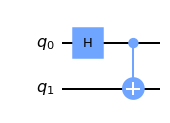

In [5]:
qc.draw('mpl') #drawing the circuit

For the Physics enthusiasts

Our initial state looks like

$$|\psi>=\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$


In [30]:
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from IPython.display import display, Math, Latex
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import *
from qiskit.visualization import array_to_latex
from math import *
from cmath import *


Our Final State vector looks like

In [7]:
psi_AB = Statevector.from_instruction(qc)
psi_AB.draw('latex')

<IPython.core.display.Latex object>

The Final Desity matrix of the circuit

In [8]:
rho_AB = DensityMatrix.from_instruction(qc)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

We can also start with a preinitialized state

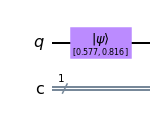

In [9]:
qc1=QuantumCircuit(1,1) #1,1 represent 1 classical Register and 1 Quantum Register
initial_state=[1/sqrt(3),sqrt(2/3)]
qc1.initialize(initial_state,0)
qc1.draw('mpl')

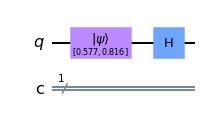

In [10]:
qc1.h(0)
qc1.draw('mpl')

Initial state vector and desity matrix looks like

In [11]:
psi_AB1 = Statevector.from_instruction(qc1)
psi_AB1.draw('latex')

<IPython.core.display.Latex object>

In [12]:
rho=DensityMatrix.from_instruction(qc1)
rho.draw('latex',prefix='\\rho=')

<IPython.core.display.Latex object>

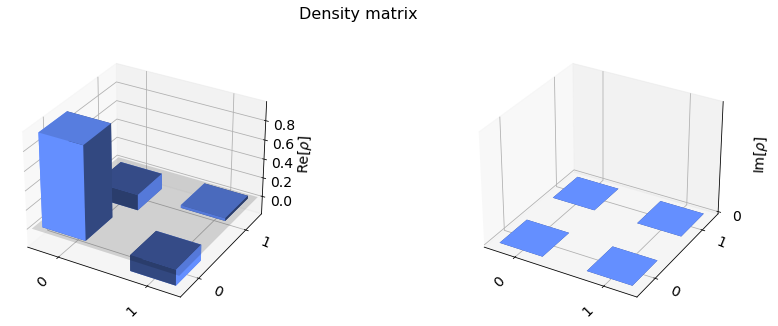

In [13]:
plot_state_city(rho.data,title='Density matrix')

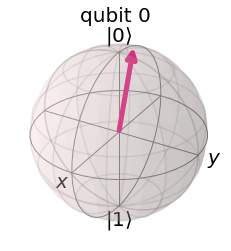

In [14]:
plot_bloch_multivector(rho.data)

### Running the initial circuit on a simulator 

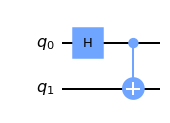

In [15]:
qc.draw('mpl')

Lets add the command to measure the Qubits

In [16]:
qc.measure_all()

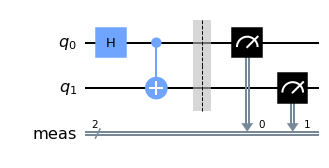

In [17]:
qc.draw('mpl')

In [33]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [35]:
backend = Aer.get_backend('aer_simulator')

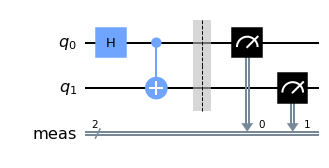

In [36]:
qct = transpile(qc, backend)
qct.draw('mpl')

In [37]:
job=execute(qc, backend=backend, shots=20000, optimization_level=0)
#print(job.name)
from qiskit.tools.monitor import job_monitor
job_monitor(job)


Job Status: job has successfully run


In [38]:
result=job.result()
counts = result.get_counts(qc)
print(counts)

{'11': 10039, '00': 9961}


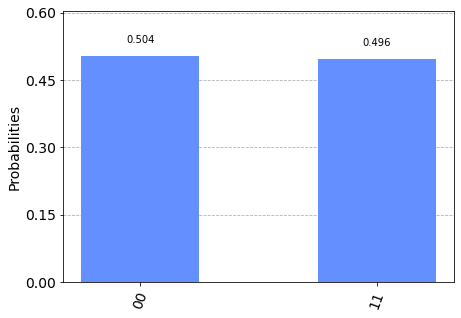

In [22]:
plot_histogram(result.get_counts(qc))

### Running on actual backend

In [23]:
IBMQ.save_account('Your IBM Account token')
IBMQ.load_account()


configrc.store_credentials:WARNING:2022-10-14 11:59:05,153: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [24]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [25]:
backend=provider.get_backend('ibmq_quito')

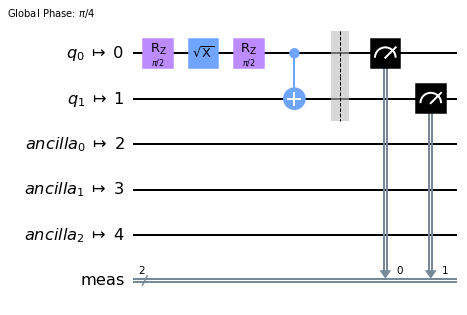

In [26]:
qct = transpile(qc, backend)
qct.draw('mpl')

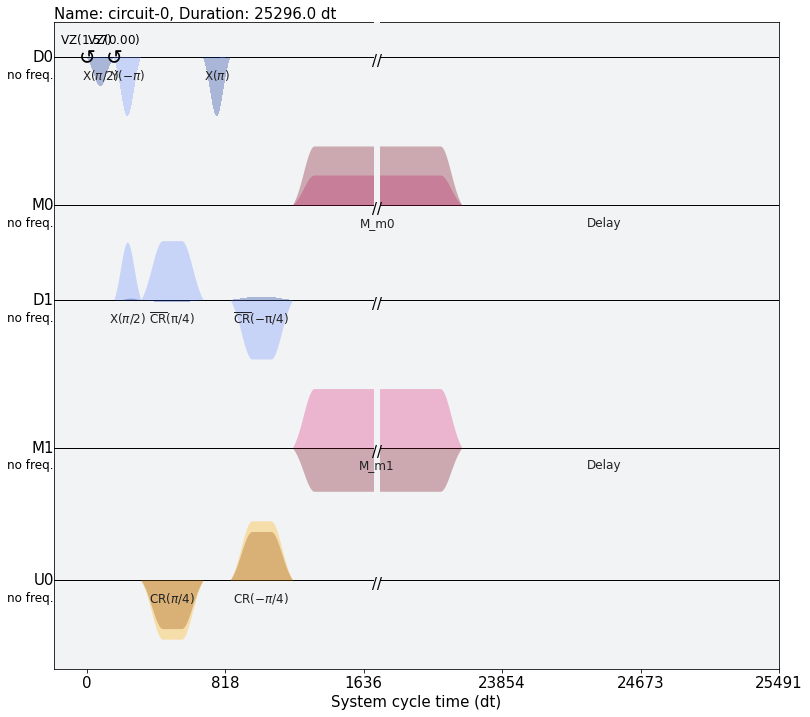

In [27]:
schedule(qct, backend).draw()

In [28]:
job=execute(qc, backend=backend, shots=20000, optimization_level=0)
from qiskit.tools.monitor import job_monitor
job_monitor(job)


Job Status: job is queued (27)    

KeyboardInterrupt: 

In [ ]:
result=job.result()
counts = result.get_counts(qc)
print(counts)

In [ ]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(result.get_counts(qc))

## Gates in Qiskit

### Pauli Gates

#### X gate or the Not Gate

$$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = u(\pi,0,\pi)$$

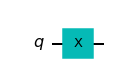

In [39]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

In [40]:
backend = BasicAer.get_backend('unitary_simulator') # Converting whole gate to a unitary

In [41]:
job = backend.run(transpile(qc, backend))
array_to_latex(job.result().get_unitary(qc, decimals=3), prefix='Output = ', max_size=24)

<IPython.core.display.Latex object>

#### Y gate

$$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = u(\pi,\pi/2,\pi/2)$$

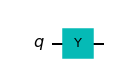

In [42]:
qc = QuantumCircuit(1)
qc.y(0)
qc.draw('mpl')


#### Z gate

$$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = u(\pi)$$

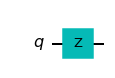

In [43]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw('mpl')

### Clifford gates

#### Hadamard gate

$$H = 1/\sqrt2 \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = u(\pi/2,0,\pi)$$

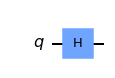

In [44]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

Similarly qiskit has S, T etc gates

### Standard Rotations

#### X axis Roation

$$Rx(\theta) = \begin{bmatrix} cos(\theta/2) & -i sin(\theta/2) \\ -i sin(\theta/2) & cos(\theta/2) \end{bmatrix} = u(\theta,-\pi/2,\pi/2)$$

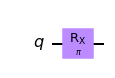

In [48]:
qc = QuantumCircuit(1)
qc.rx(pi,0)
qc.draw('mpl')

In [46]:
backend = BasicAer.get_backend('unitary_simulator') # Converting whole gate to a unitary

In [49]:
job = backend.run(transpile(qc, backend))
array_to_latex(job.result().get_unitary(qc, decimals=3), prefix='Output = ', max_size=24)

<IPython.core.display.Latex object>

#### Similarly Y and Z axis Roation

$$Ry(\theta) = \begin{bmatrix} cos(\theta/2) & sin(\theta/2) \\ sin(\theta/2) & cos(\theta/2) \end{bmatrix} = u(\theta,0,0)$$ $$Rz(\phi) = \begin{bmatrix} e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2} \end{bmatrix} = u(0,0,\phi)$$

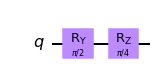

In [50]:
qc = QuantumCircuit(1)
qc.ry(pi/2,0)
qc.rz(pi/4,0)
qc.draw('mpl')

## Unitary gate

Qiskit gives you access to the general unitary using the u gate, which has the following matrix form

$$U(\theta,\phi,\lambda) = \begin{bmatrix} cos(\theta/2) & e^{i\lambda}sin(\theta/2) \\ e^{i\phi}sin(\theta/2) & e^{i(\phi+\lambda)}cos(\theta/2) \end{bmatrix}$$

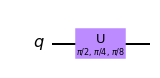

In [51]:
qc = QuantumCircuit(1)

qc.u(pi/2,pi/4,pi/8,0)
qc.draw('mpl')

In [52]:
job = backend.run(transpile(qc, backend))
array_to_latex(job.result().get_unitary(qc, decimals=3), prefix='Output = ', max_size=24)

<IPython.core.display.Latex object>

## Multiqubit Gates

### Controlled Pauli Gates

#### Controlled-X (or, Controlled-NOT) gate

The Controlled-NOT gate flips the target qubit when the control qubit is in the state |1> .

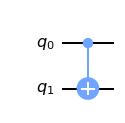

In [53]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw('mpl')

 If we take the LSB as the control qubit (e.g. cx(q[0],q[1])), then the matrix would look like

In [54]:
job = backend.run(transpile(qc, backend))
array_to_latex(job.result().get_unitary(qc, decimals=3), prefix='Output = ', max_size=24)

<IPython.core.display.Latex object>

However, when the MSB is the control qubit, (e.g. cx(q[1],q[0])), this gate is equivalent to the following matrix:

 


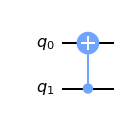

In [55]:
qc = QuantumCircuit(2)
qc.cx(1,0) #control and target are opposite to previous operation
qc.draw('mpl')


In [56]:
job = backend.run(transpile(qc, backend))
array_to_latex(job.result().get_unitary(qc, decimals=3), prefix='Output = ', max_size=24)

<IPython.core.display.Latex object>

#### Similarly for Controlled Y and Controled Z gates

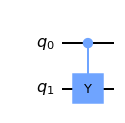

In [57]:
qc = QuantumCircuit(2)
qc.cy(0,1)
qc.draw('mpl')

In [58]:
job = backend.run(transpile(qc, backend))
array_to_latex(job.result().get_unitary(qc, decimals=3), prefix='Output = ', max_size=24)

<IPython.core.display.Latex object>

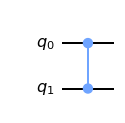

In [59]:
qc = QuantumCircuit(2)
qc.cz(0,1)
qc.draw('mpl')

In [60]:
job = backend.run(transpile(qc, backend))
array_to_latex(job.result().get_unitary(qc, decimals=3), prefix='Output = ', max_size=24)

<IPython.core.display.Latex object>

### Controlled Unitary Gate

There is a controlled version of the U gate (generic single qubit rotation), including a possible global phase  of the U gate.

$$Cu(\theta,\phi,\lambda) = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & e^{-i(\phi+\lambda)/2}cos(\theta/2) & 0 & e^{-i(\phi-\lambda)/2}sin(\theta/2) \\ 0 & 0 & 1 & 0\\ 0 & e^{i(\phi-\lambda)/2}sin(\theta/2) & 0 & e^{i(\phi+\lambda)/2}cos(\theta/2) \end{bmatrix}$$

In [ ]:
qc = QuantumCircuit(2)
qc.cu(pi/2, pi/2, pi/2, 0, 0, 1)
qc.draw('mpl')

In [ ]:
job = backend.run(transpile(qc, backend))
array_to_latex(job.result().get_unitary(qc, decimals=3), prefix='Output = ', max_size=24)

## Toffoli Gate (Three-qubit gates)

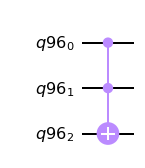

In [61]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw('mpl')

In [62]:
job = backend.run(transpile(qc, backend))
array_to_latex(job.result().get_unitary(qc, decimals=3), prefix='Output = ', max_size=24)

<IPython.core.display.Latex object>

## Measurements

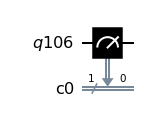

In [63]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.measure(q, c)
qc.draw('mpl')

In [64]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 1024}

### Reset

It is also possible to reset qubits to the |0> state in the middle of computation. Note that reset is not a Gate operation, since it is irreversible.

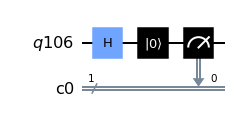

In [65]:
qc = QuantumCircuit(q, c)
qc.h(0)
qc.reset(q[0])
qc.measure(q, c)
qc.draw('mpl')

In [66]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 1024}

### Conditional Operators

It is also possible to do operations conditioned on the state of the classical register

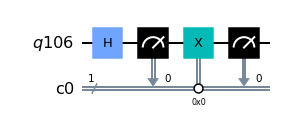

In [67]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw('mpl')

In [68]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'1': 1024}

## Unitary to Gate

In [82]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
circuit=QuantumCircuit(qr,cr)

In [83]:
U= np.array([[0.707107,  0.707107], [0.707107, -0.707107]])

In [84]:
circuit.unitary(U, [0], label='Hadamard')

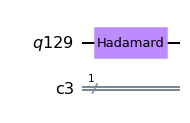

In [85]:
circuit.draw('mpl')


In [86]:

backend = BasicAer.get_backend('unitary_simulator')


In [87]:
job = backend.run(transpile(circuit, backend))
array_to_latex(job.result().get_unitary(circuit, decimals=3), prefix='Output = ', max_size=24)

<IPython.core.display.Latex object>

In [88]:
circuit.measure_all()
backend = Aer.get_backend('aer_simulator')
job = backend.run(transpile(circuit, backend))
job.result().get_counts(circuit)

{'1 0': 509, '0 0': 515}

## Qiskit Pluse Simulations

In [89]:
from qiskit import assemble, pulse
from qiskit.pulse import Acquire, AcquireChannel, MemorySlot, ControlChannel, DriveChannel
from qiskit.circuit import Gate
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.pulse.library import Gaussian
from qiskit.test import mock
from qiskit.visualization.pulse_v2 import draw
from qiskit.extensions import *

In [90]:
# hide pulsesimulator warning
import warnings
warnings.filterwarnings('ignore')


In [92]:
with pulse.build(backend, name='Custom') as gate_pulse:
    # custom pulse for this demo
    microwave = Gaussian(duration=310, amp=.36, sigma=80)
    pulse.play(microwave, DriveChannel(0))


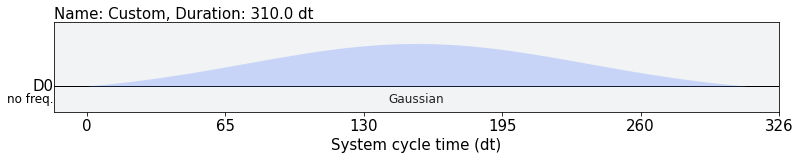

In [93]:
gate_pulse.draw()


In [94]:
gate = Gate(name='Custom', label='QG', num_qubits=1, params=[])

In [95]:
qc = QuantumCircuit(1, 1)

# append the custom gate
qc.append(gate, [0])
qc.measure(0, 0)

In [96]:
qc.add_calibration('Custom', [0], gate_pulse)


In [97]:
backend = mock.FakeArmonk()


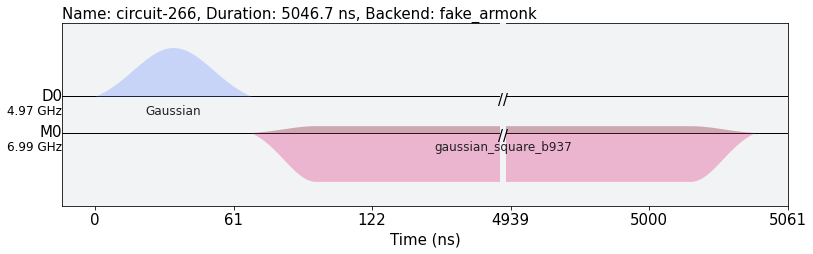

In [98]:
qc.draw(output='mpl')

# unnecessary with calibrated gates
qc_t = transpile(qc, backend)
qc_pulse = schedule(qc_t, backend)
draw(qc_pulse, backend=backend)

In [99]:
# create a pulse simulator and model
backend_sim = PulseSimulator.from_backend(backend)
backend_model = PulseSystemModel.from_backend(backend)

In [100]:
# prepare the pulse job
pulse_qobj = assemble(qc_pulse, backend=backend_sim)

In [101]:
sim_result = backend_sim.run(pulse_qobj, SystemModel=backend_model).result()
print(sim_result.get_counts())
# plot circuit output
plot_histogram(sim_result.get_counts()).show()

{'0': 519, '1': 505}
